In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [3]:
houses = pd.read_csv("train.csv")
display(f"shape of the dataset {houses.shape}", houses.head(3))

'shape of the dataset (1460, 81)'

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [7]:
# houses describe object columns
houses.describe(include='O')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [10]:
# missing columns in all houses
missing_data = houses.isnull().sum().sort_values(ascending=False)

# percent missing_data in each column
percent = (houses.isnull().sum()/houses.isnull().count()).sort_values(ascending=False)

# selecting only the columns with missing data
missing_columns = missing_data[missing_data > 0]

# Display columns with missing data
missing_data = pd.concat([missing_data, percent], axis=1, keys=['Total', 'Percent'])
# sorting those columns to see who have the most missing data
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [11]:
# Exploring the types of the columns that have missing data
houses.loc[:, missing_columns.index].dtypes

PoolQC           object
MiscFeature      object
Alley            object
Fence            object
FireplaceQu      object
LotFrontage     float64
GarageYrBlt     float64
GarageCond       object
GarageType       object
GarageFinish     object
GarageQual       object
BsmtFinType2     object
BsmtExposure     object
BsmtQual         object
BsmtCond         object
BsmtFinType1     object
MasVnrArea      float64
MasVnrType       object
Electrical       object
dtype: object

In [13]:
# length of columns that have number data type
houses.drop(columns="Id").select_dtypes(include=['number']).columns.shape[0]

37

this plot show the outoutliers in each column


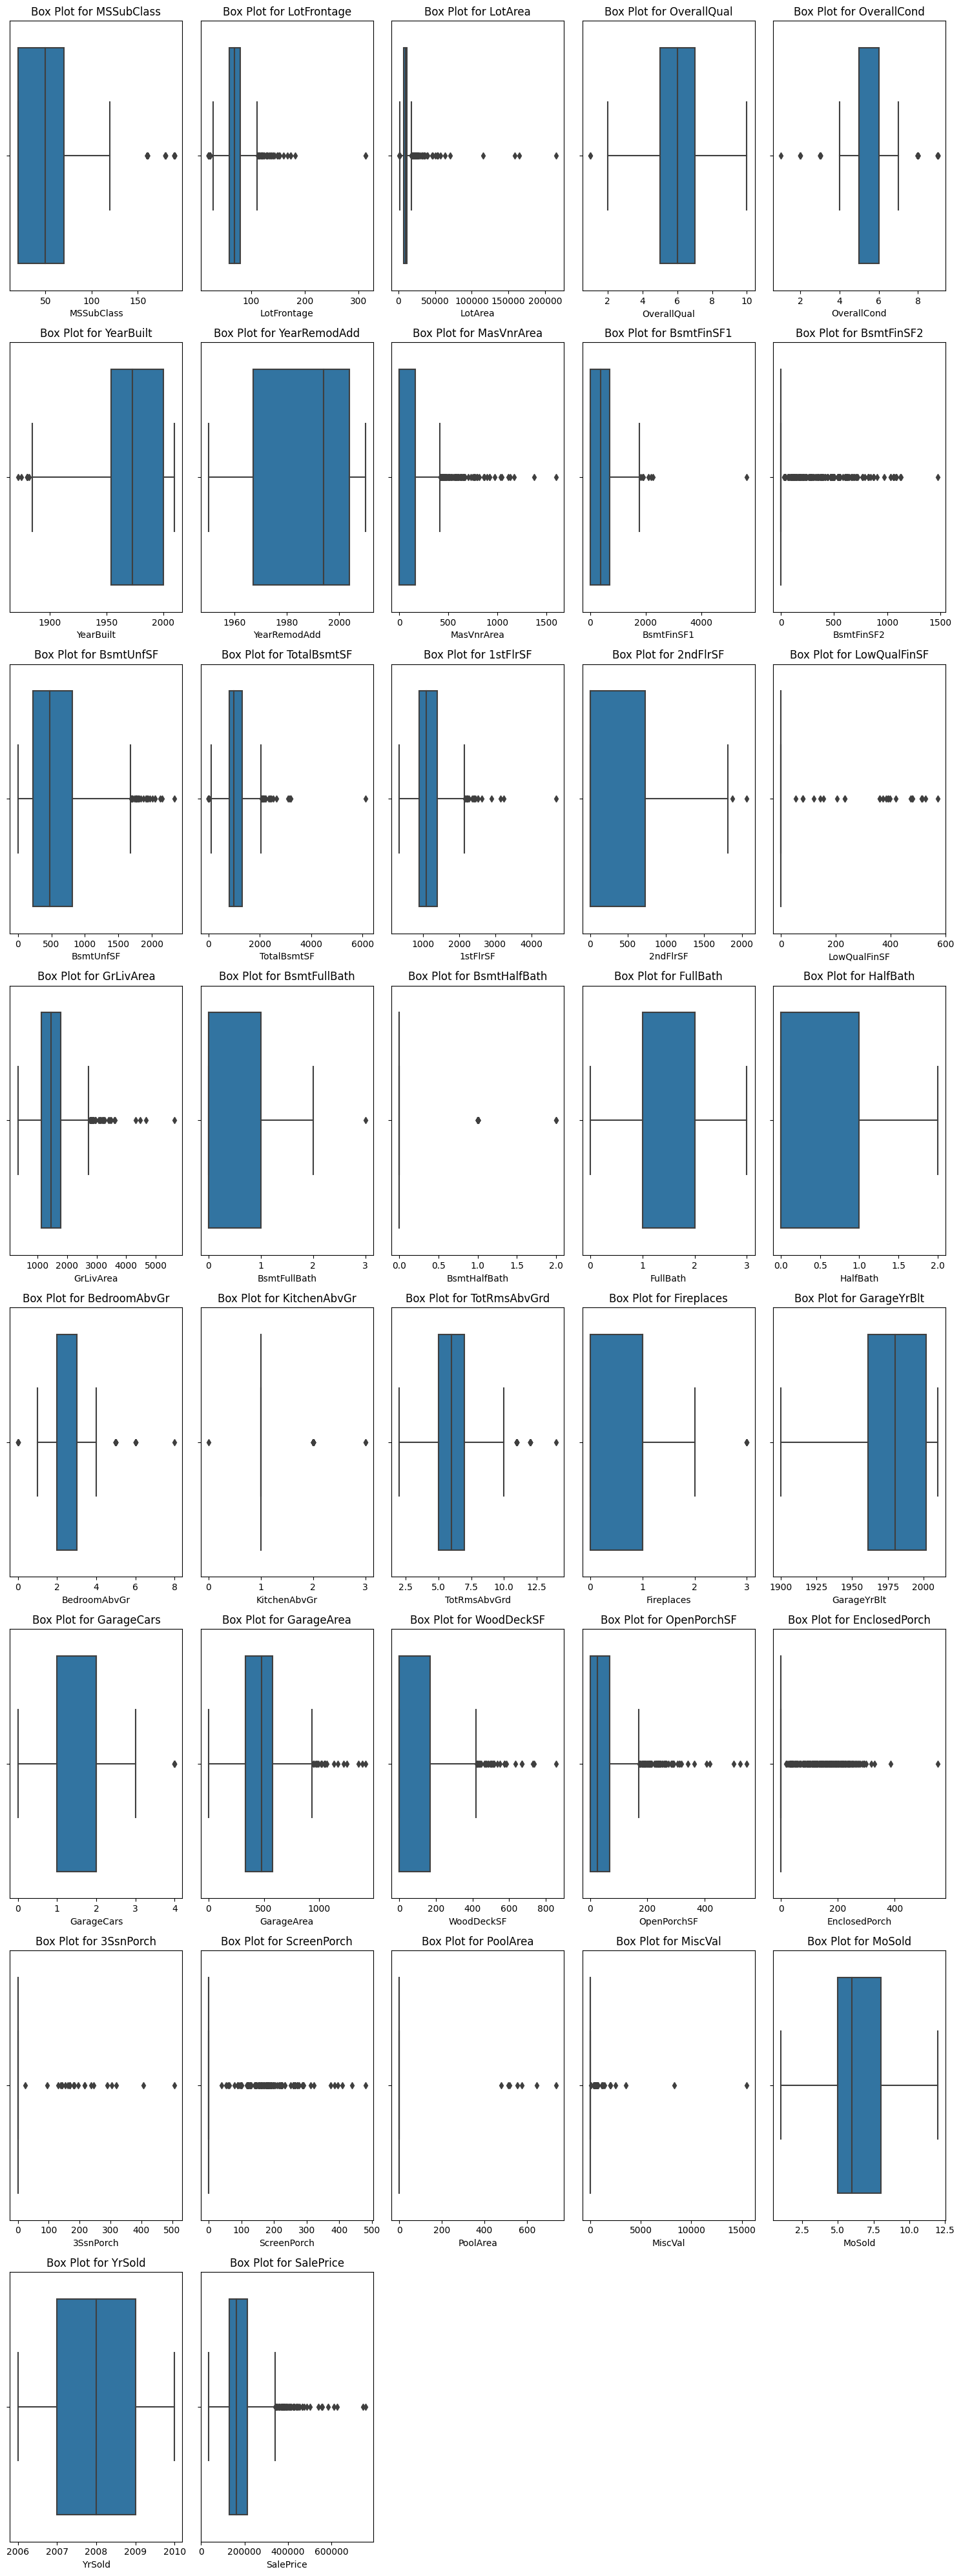

In [14]:
print("this plot show the outoutliers in each column")

# Select only numerical features
numerical_features = houses.drop(columns="Id").select_dtypes(include=['number'])

# Determine the number of rows and columns for the grid layout
num_features = len(numerical_features.columns)
num_rows = 8  # Set the number of rows
num_cols = 5  # Set the number of columns

# Calculate the figure size based on the number of rows and columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 40))

# Flatten the axes array to simplify indexing
'''
subplot returns a 2D index matrix to access the figures so when we flatten it inot 1D it's easier to access
'''
axes = axes.flatten()

# Iterate over numerical features and create individual box plots in subplots
for i, column in enumerate(numerical_features.columns):
    if i < num_features:
        sns.boxplot(x=houses[column], ax=axes[i])
        axes[i].set_title(f'Box Plot for {column}')


# Remove empty subplots (8*5 = 40 but we have only 37 features to plot)
for i in range(len(numerical_features.columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()

In [15]:
houses.drop(columns="Id").select_dtypes(include=['number']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

<Axes: >

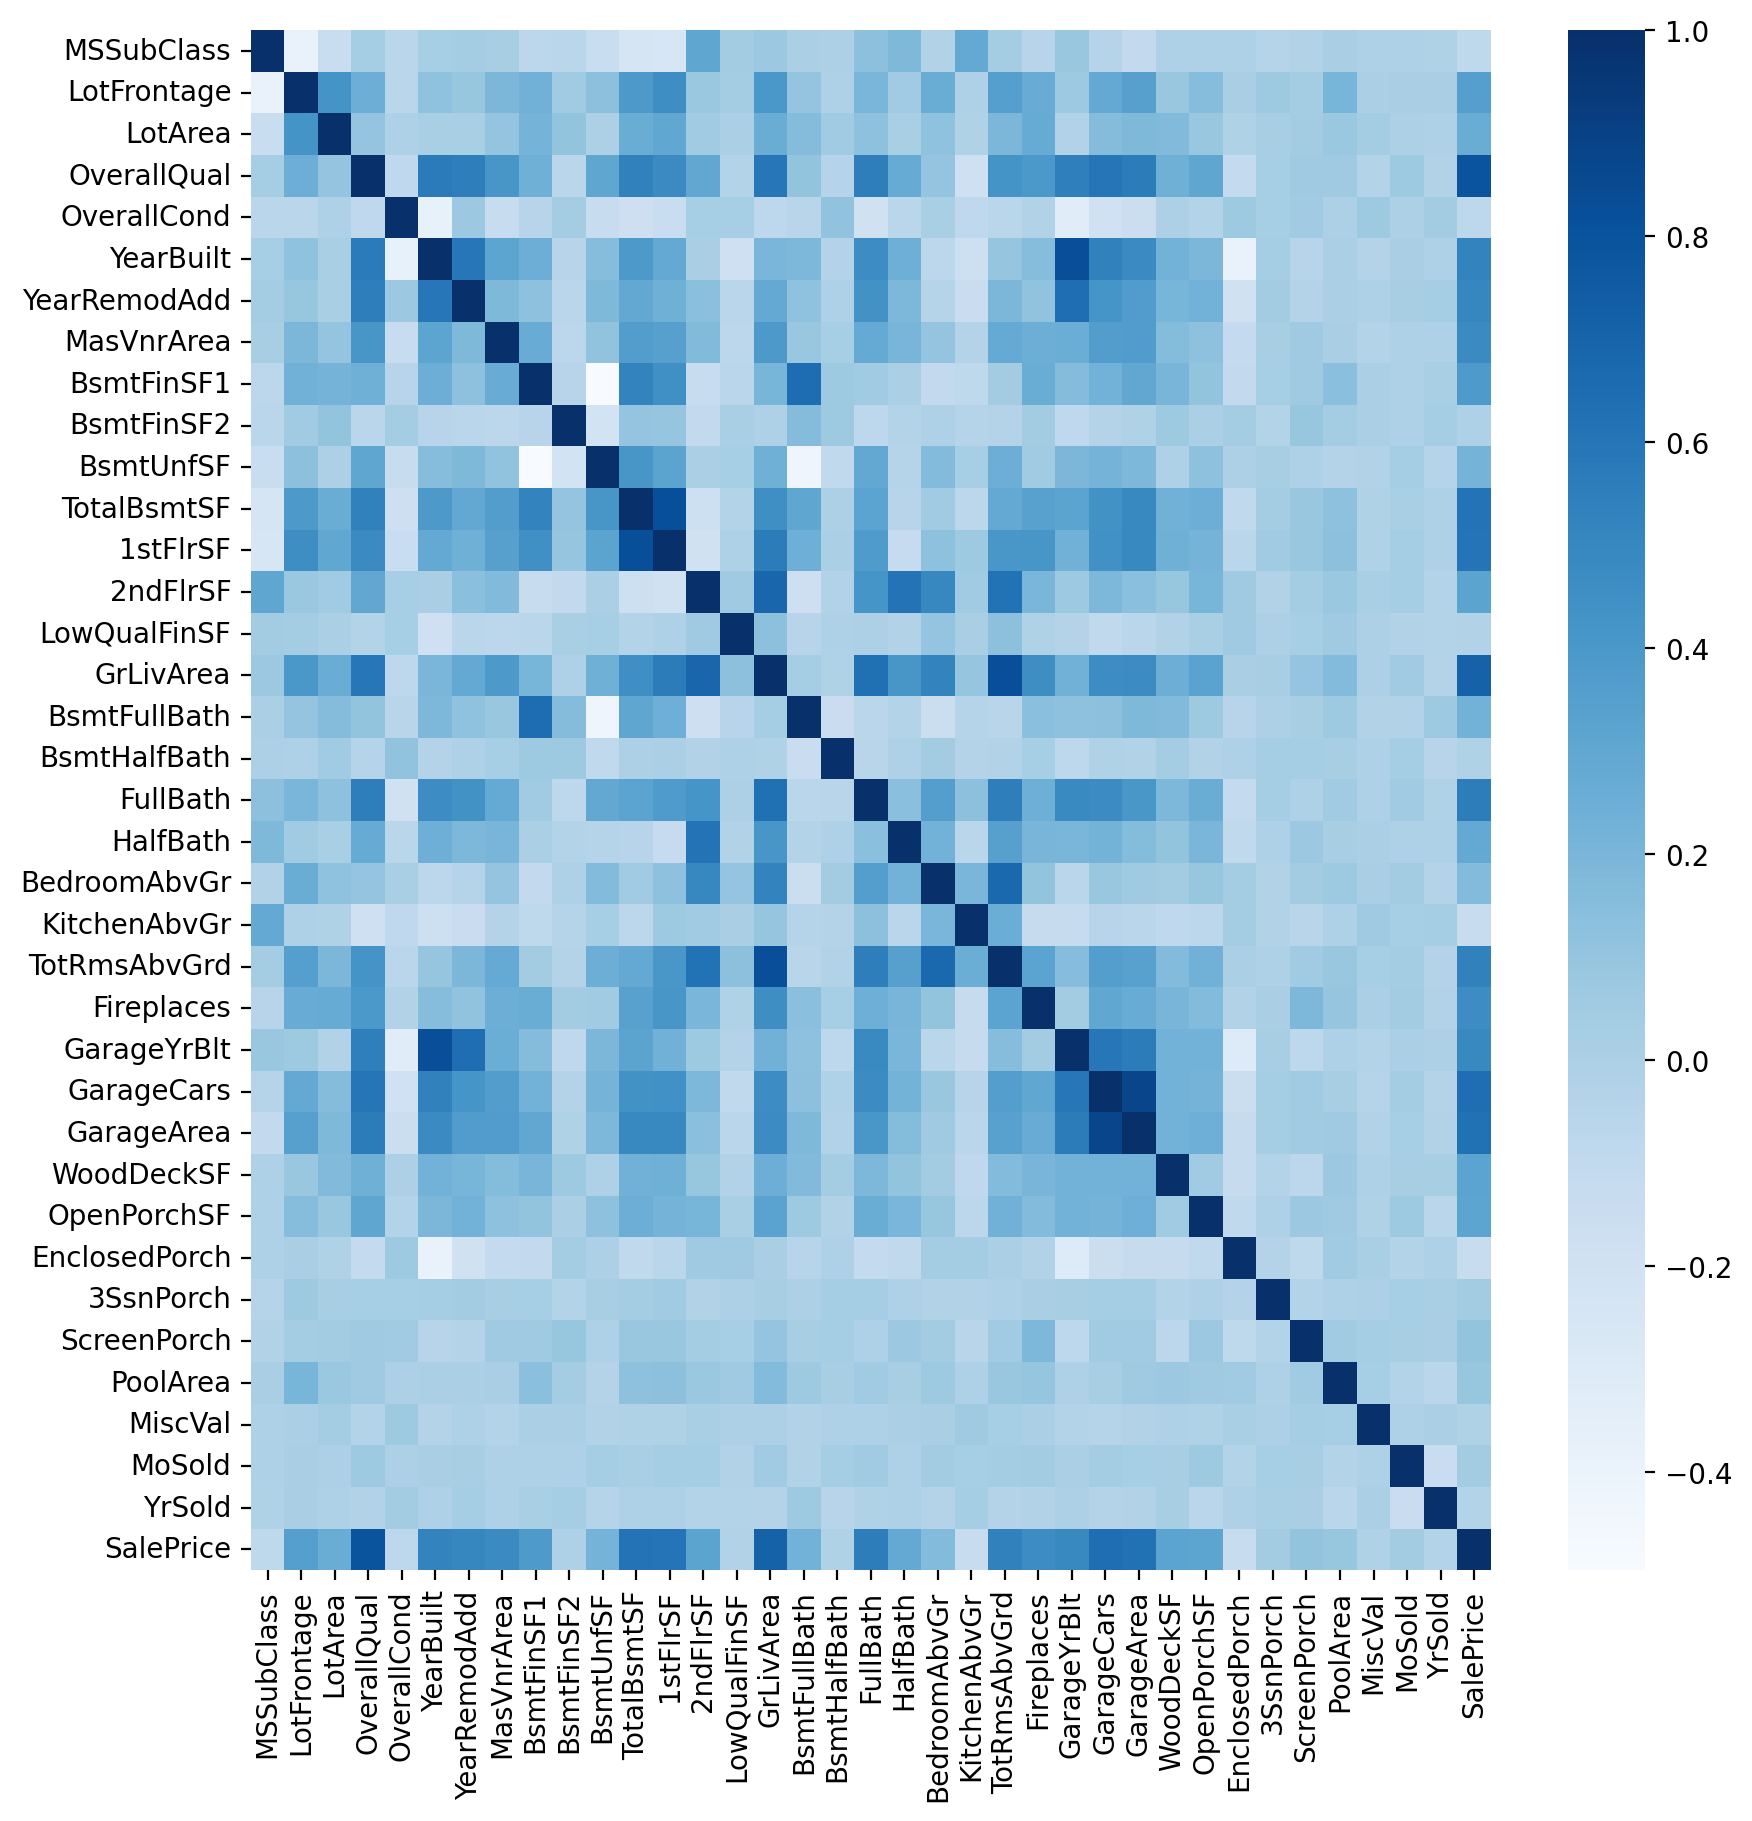

In [19]:
# correlation matrix
corr = houses.drop(columns='Id').corr(numeric_only=True)

# figure settings
plt.figure(figsize=(10,10), dpi=200)

# corr matrix "heatmap"
sns.heatmap(corr, cmap="Blues")

In [20]:
correlation=corr["SalePrice"].apply(abs).sort_values(ascending=False).reset_index()
print(correlation.shape)
correlation

(37, 2)


,index,SalePrice
0,SalePrice,1.000000
1,OverallQual,0.790982
2,GrLivArea,0.708624
3,GarageCars,0.640409
4,GarageArea,0.623431
5,TotalBsmtSF,0.613581
6,1stFlrSF,0.605852
7,FullBath,0.560664
8,TotRmsAbvGrd,0.533723
9,YearBuilt,0.522897


# Feature Selection

In [21]:
houses = houses.drop((missing_data[missing_data['Total'] > 81]).index,axis=1) # will remove 7 feature
houses = houses.drop(houses.loc[houses['Electrical'].isnull()].index) # remove one row that contain NaN
print(f"shap after delete columns that has NaN greater than 81 value: {houses.shape}")
houses.isnull().sum().max() #just checking that there's no missing data missing...

shap after delete columns that has NaN greater than 81 value: (1459, 75)


81

In [22]:
print(f"before delete weak correlation => {houses.shape}")
houses = houses.drop(correlation.iloc[21: , 0].values,axis=1)
print(f"after delete weak correlation => {houses.shape}")

before delete weak correlation => (1459, 75)
after delete weak correlation => (1459, 59)


In [23]:
# find name of columns that has dtypes => number
name_of_coll = houses.drop(columns="Id").select_dtypes(include=['number']).columns

# fillna in each column using sample()
for col in name_of_coll :
    nan_indices = houses[col].isnull() # find place(index) of NaN
    random_samples = houses[col].dropna().sample(n=nan_indices.sum(), replace=True) # sample of coll without NaN
    houses.loc[nan_indices, col] = random_samples.values

# show sum of NaN in each column
col_has_numbers = houses.drop(columns="Id").select_dtypes(include=['number'])
col_has_numbers.isnull().sum().sort_values(ascending=False)

LotArea         0
OverallQual     0
OpenPorchSF     0
WoodDeckSF      0
GarageArea      0
GarageCars      0
GarageYrBlt     0
Fireplaces      0
TotRmsAbvGrd    0
HalfBath        0
FullBath        0
GrLivArea       0
2ndFlrSF        0
1stFlrSF        0
TotalBsmtSF     0
BsmtFinSF1      0
MasVnrArea      0
YearRemodAdd    0
YearBuilt       0
SalePrice       0
dtype: int64

In [24]:
name_of_coll = houses.drop(columns="Id").select_dtypes(include=['object']).columns

for col in name_of_coll :
    # using mode()
    mode_for_coll = houses[col].mode()[0]
    houses[col].fillna(mode_for_coll, inplace=True)

# show sum of NaN in each column
col_has_numbers = houses.drop(columns="Id").select_dtypes(include=['object'])
col_has_numbers.isnull().sum().sort_values(ascending=False)

MSZoning         0
Electrical       0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
KitchenQual      0
Street           0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
BsmtQual         0
Foundation       0
ExterCond        0
ExterQual        0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
SaleCondition    0
dtype: int64

In [25]:
def handle_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = dataframe[(dataframe[column] < lower) | (dataframe[column] > upper)]
    dataframe.loc[(dataframe[col]>upper,col)]=upper
    dataframe.loc[(dataframe[col]<lower,col)]=lower
    # np.where(condition, if True excute this, NO excute this)
    # dataframe[column] = np.where((dataframe[column] < lower) | (dataframe[column] > upper), dataframe[column].median(), dataframe[column])
    return dataframe


for col in houses.drop(columns="Id").select_dtypes(include=["number"]).columns :
    houses = handle_outliers_iqr(houses, col)

this plot show the outoutliers in each column After delete them


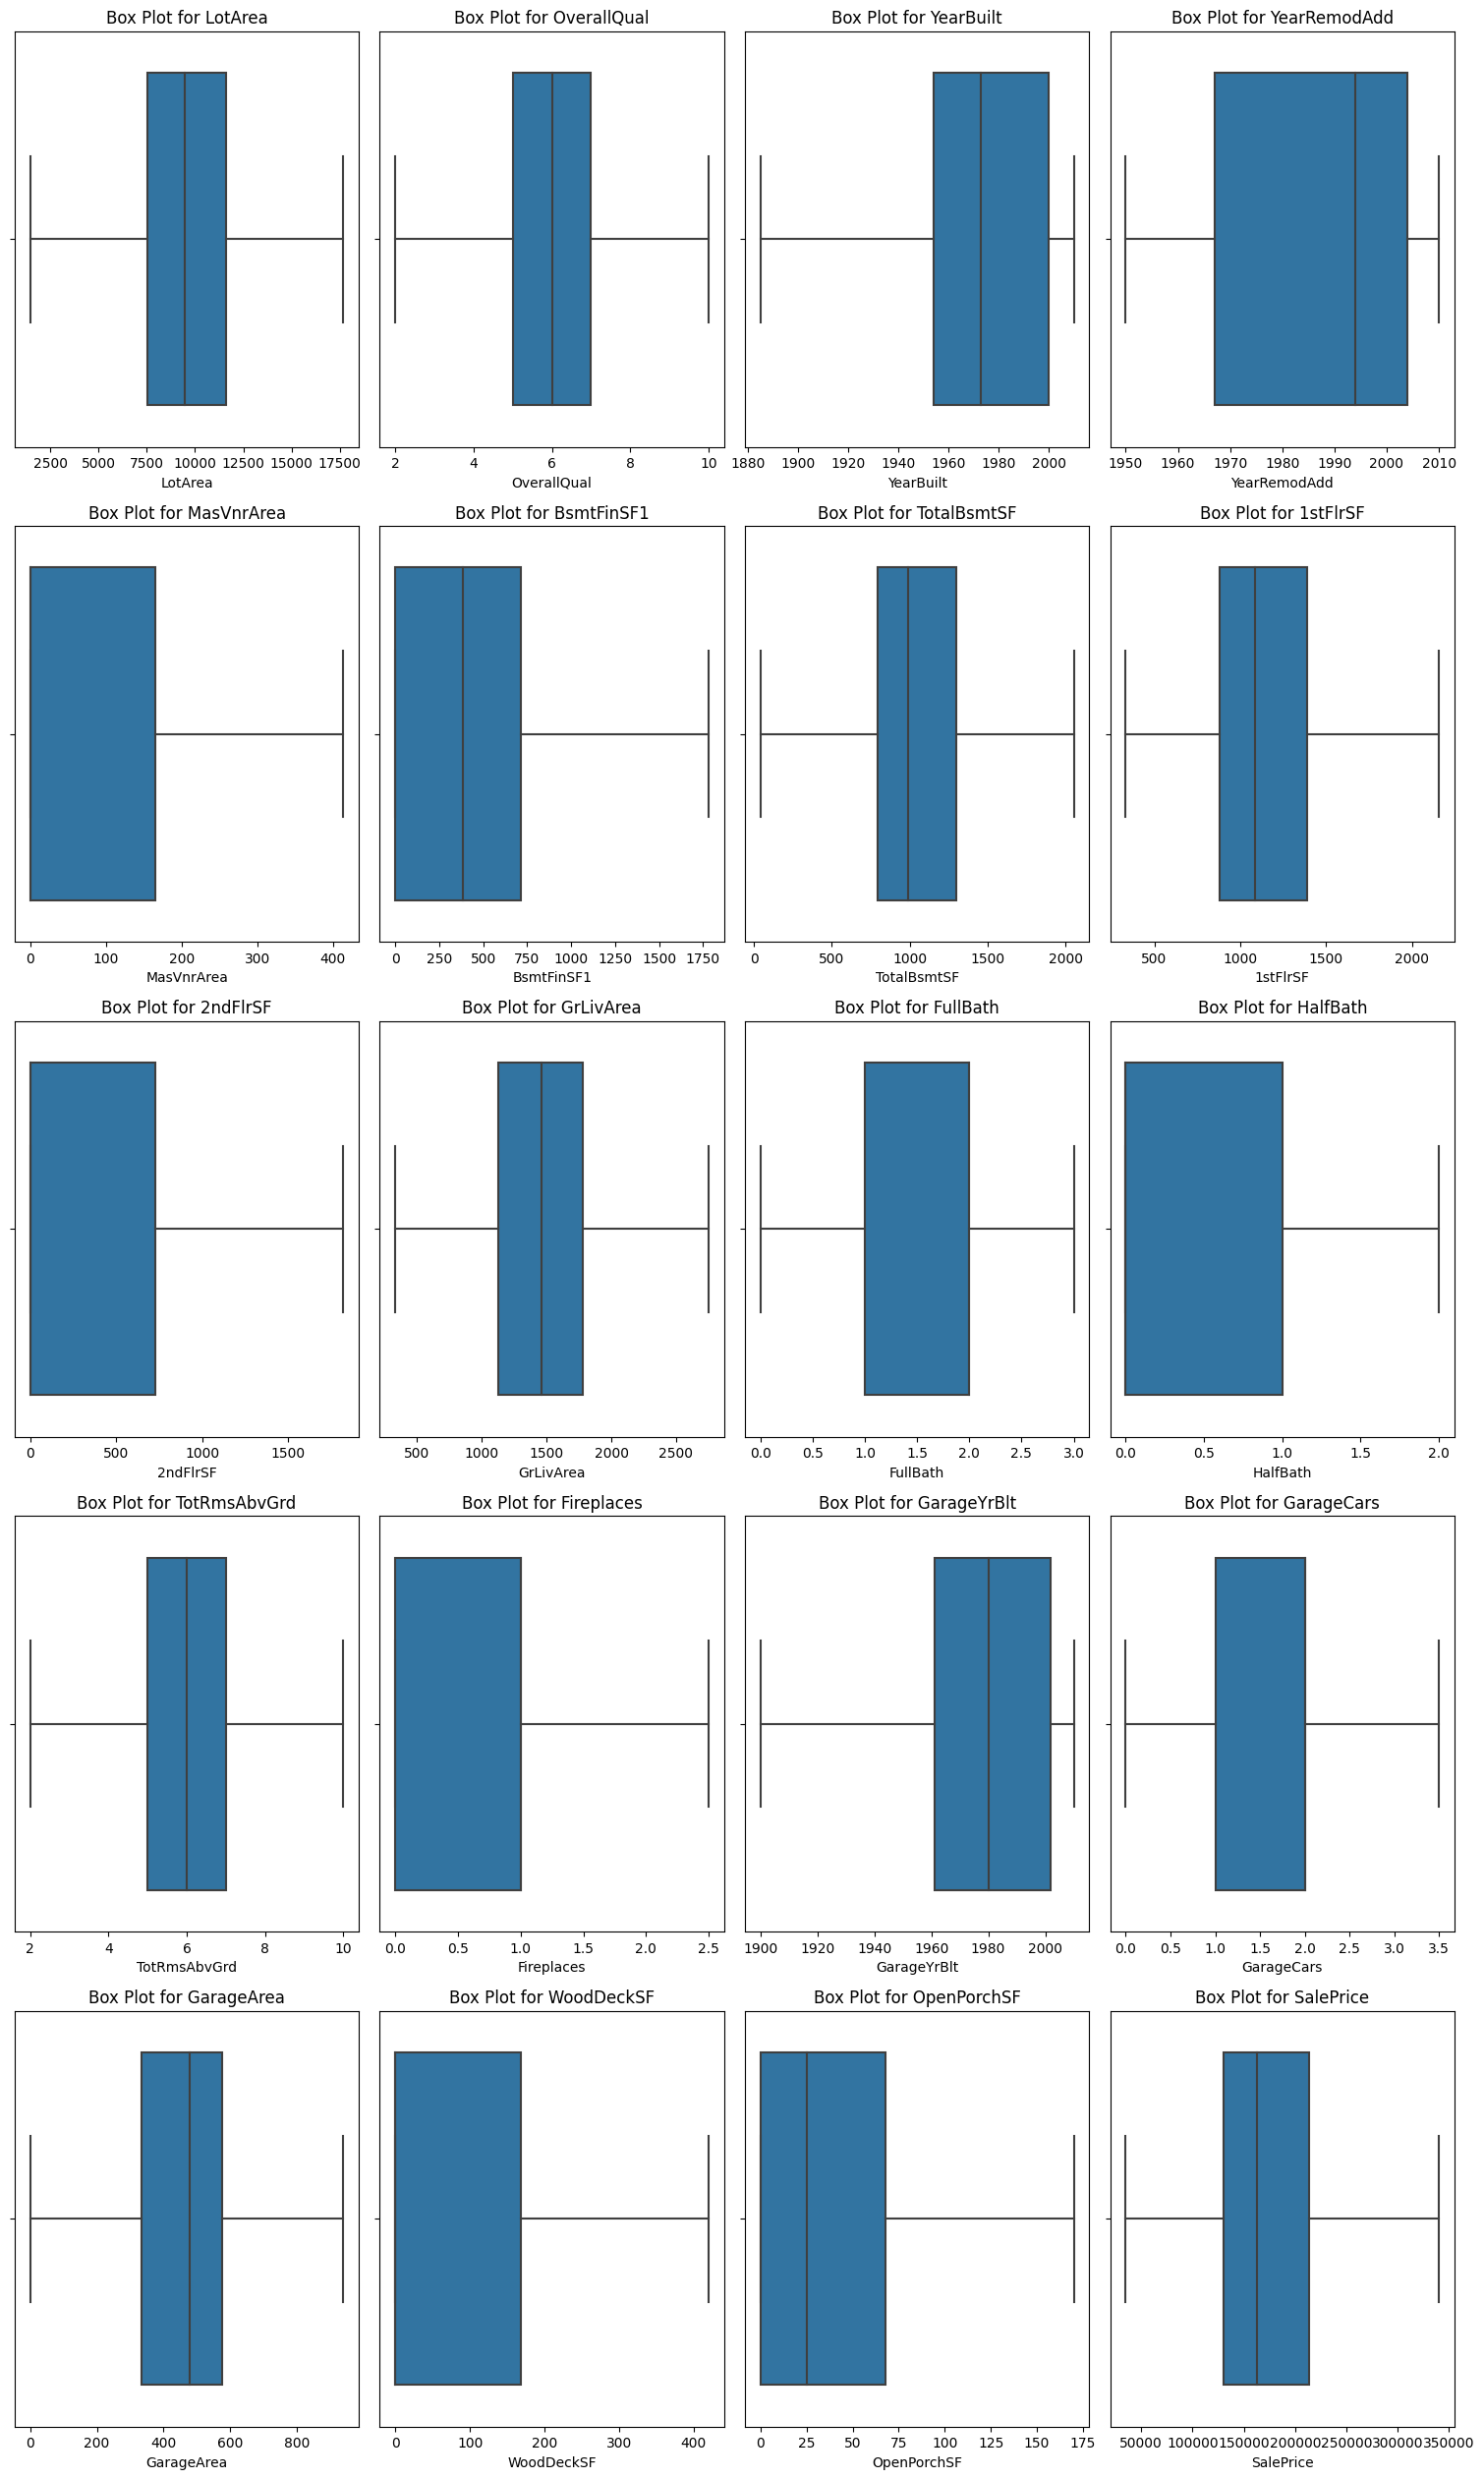

In [26]:
print("this plot show the outoutliers in each column After delete them")

# Select only numerical features
numerical_features = houses.drop(columns="Id").select_dtypes(include=['number'])
# Determine the number of rows and columns for the grid layout
num_features = len(numerical_features.columns)
num_rows = 8  # Set the number of rows
num_cols = 4  # Set the number of columns

# Calculate the figure size based on the number of rows and columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 40))

# Flatten the axes array to simplify indexing
'''
subplot returns a 2D index matrix to access the figures so when we flatten it inot 1D it's easier to access
'''
axes = axes.flatten()

# Iterate over numerical features and create individual box plots in subplots
for i, column in enumerate(numerical_features.columns):
    if i < num_features:
        sns.boxplot(x=houses[column], ax=axes[i])
        axes[i].set_title(f'Box Plot for {column}')


# Remove empty subplots (8*5 = 40 but we have only 37 features to plot)
for i in range(len(numerical_features.columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()

In [27]:
# object (text) columns
obj_col = houses.drop(columns="Id").select_dtypes(include=['object']).columns
obj_col = pd.DataFrame(obj_col,columns=["text col"])
print(f"number of column that have text => {obj_col.shape}")
obj_col

number of column that have text => (38, 1)


,text col
0,MSZoning
1,Street
2,LotShape
3,LandContour
4,Utilities
5,LotConfig
6,LandSlope
7,Neighborhood
8,Condition1
9,Condition2


In [28]:
# using labelEncoder to convert objects
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in obj_col.values.flatten():
    houses[col]= encoder.fit_transform(houses[col])


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score, KFold, train_test_split

In [30]:
# split data to features and target
X = houses.iloc[:, :-1].values
y = houses.iloc[:, -1:].values

# split data to train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [31]:
# standardscaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True,with_std=True)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [32]:
# Cross-validated scores
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(LinearRegression(), X_train, y_train, cv=cv)
print("Cross-validated scores:", scores)
print(f"Mean Cross-validated-accuracy: {scores.mean()}")

Cross-validated scores: [0.89318418 0.87594792 0.8532102  0.84982297 0.86267692]
Mean Cross-validated-accuracy: 0.8669684369854755


In [33]:
# create and train LinearRegression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [34]:
# score for train
print(f"train score: {model.score(X_train, y_train)}")
# score for test
print(f"test score: {model.score(X_test, y_test)}")

train score: 0.8860598505877446
test score: 0.9010360921095348


In [35]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE is the square root of MSE
print(f"\nMean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


Mean Absolute Error: 16917.27247305624
Mean Squared Error: 488548980.7620524
Root Mean Squared Error: 22103.144137476287


In [36]:
# final accuracy
r2 = r2_score(y_test, y_pred)
print(f"Coefficient of Determination (R^2): {r2}")

Coefficient of Determination (R^2): 0.9010360921095348


In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [38]:
param_grid = {'n_neighbors': [3, 5, 7, 9, 11],
              "p" : [1,2]}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(best_params)

{'n_neighbors': 7, 'p': 1}


In [39]:
# Create and train the KNN regression model
knn_model = grid_search.best_estimator_
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)


In [40]:
# Cross-Validation
scores = cross_val_score(knn_model, X_train, y_train, cv=5)
average_score = scores.mean()
print(f"Cross-Validation score:{average_score}")

Cross-Validation score:0.8391469218219896


In [41]:
pd.DataFrame(grid_search.cv_results_).to_csv("grid_search_KNN.csv")
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001173,0.000601,0.066021,0.069015,3,1,"{'n_neighbors': 3, 'p': 1}",0.840320,0.807255,0.804749,0.830227,0.831952,0.822901,0.014236,5
1,0.000706,0.000030,0.003268,0.000285,3,2,"{'n_neighbors': 3, 'p': 2}",0.813026,0.784969,0.770987,0.776536,0.813234,0.791750,0.018015,10
2,0.000782,0.000035,0.016285,0.000982,5,1,"{'n_neighbors': 5, 'p': 1}",0.860680,0.810804,0.830153,0.825636,0.844987,0.834452,0.017055,3
3,0.000864,0.000106,0.005885,0.002893,5,2,"{'n_neighbors': 5, 'p': 2}",0.825237,0.812688,0.819965,0.797517,0.838115,0.818704,0.013462,8
4,0.000805,0.000053,0.028952,0.009254,7,1,"{'n_neighbors': 7, 'p': 1}",0.862054,0.821529,0.820405,0.831496,0.860250,0.839147,0.018386,1
5,0.000889,0.000088,0.016130,0.006120,7,2,"{'n_neighbors': 7, 'p': 2}",0.827575,0.812644,0.805126,0.809013,0.835896,0.818051,0.011723,9
6,0.000954,0.000141,0.035958,0.015512,9,1,"{'n_neighbors': 9, 'p': 1}",0.855370,0.818678,0.816942,0.841597,0.852676,0.837053,0.016385,2
7,0.002254,0.002819,0.010226,0.007724,9,2,"{'n_neighbors': 9, 'p': 2}",0.826831,0.809396,0.803286,0.813897,0.841972,0.819076,0.013815,7
8,0.000805,0.000032,0.029030,0.005758,11,1,"{'n_neighbors': 11, 'p': 1}",0.847830,0.818560,0.813062,0.842719,0.848261,0.834086,0.015149,4
9,0.000798,0.000039,0.009750,0.003143,11,2,"{'n_neighbors': 11, 'p': 2}",0.834488,0.808020,0.806798,0.811110,0.838758,0.819835,0.013845,6


In [42]:
# Evaluate the model
ae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE is the square root of MSE
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


Mean Absolute Error: 16917.27247305624
Mean Squared Error: 648207592.2386916
Root Mean Squared Error: 25459.921292861287


In [43]:
r2 = r2_score(y_test, y_pred)
print(f"Coefficient of Determination (R^2): {r2}")

Coefficient of Determination (R^2): 0.8686945240328854
